<a href="https://colab.research.google.com/github/ushafromwork/DeepLearning/blob/Deep-Learning-Projects/DL_Project2_Dog_Vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#Extracting Dataset Using Kaggle API
!pip install Kaggle

In [47]:
!ls -l

total 831632
-rw-r--r-- 1 root root 851576689 Dec 11  2019 dogs-vs-cats.zip
-rw-r--r-- 1 root root        64 Nov 12 04:44 kaggle.json
drwxr-xr-x 1 root root      4096 Nov  8 14:19 sample_data


In [48]:
import os

# Check if kaggle.json exists in the current directory
print("Does kaggle.json exist in the current directory?", os.path.isfile("kaggle.json"))
# List files in the current directory
print("Files in the current directory:", os.listdir("."))

Does kaggle.json exist in the current directory? True
Files in the current directory: ['.config', '.ipynb_checkpoints', 'dogs-vs-cats.zip', 'kaggle.json', 'sample_data']


In [49]:
from google.colab import files
files.upload()

{}

In [50]:
#configuring the path of kaggle.json file
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Importing the Dog Vs Cat Dataset from Kaggle

In [51]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [54]:
#extracting the compressed data
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The datset is extracted')


The datset is extracted


In [55]:
#extracting the compressed train data
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The datset is extracted')

The datset is extracted


In [56]:
import os
#counting the number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('no.of images:',file_count)

no.of images: 25000


In [57]:
#printing the name of images

file_names=os.listdir('/content/train')
print(file_names)

['cat.9054.jpg', 'dog.8695.jpg', 'cat.10449.jpg', 'cat.11747.jpg', 'dog.12143.jpg', 'dog.2484.jpg', 'cat.2234.jpg', 'dog.6213.jpg', 'cat.2988.jpg', 'dog.8965.jpg', 'dog.4695.jpg', 'cat.11826.jpg', 'cat.3229.jpg', 'dog.9223.jpg', 'cat.3402.jpg', 'dog.2350.jpg', 'cat.2779.jpg', 'dog.6644.jpg', 'cat.7396.jpg', 'dog.10583.jpg', 'dog.6127.jpg', 'cat.7725.jpg', 'cat.6290.jpg', 'dog.7309.jpg', 'dog.9191.jpg', 'dog.7180.jpg', 'cat.7760.jpg', 'cat.9556.jpg', 'cat.10805.jpg', 'dog.6738.jpg', 'cat.9425.jpg', 'dog.5440.jpg', 'cat.5118.jpg', 'dog.6409.jpg', 'dog.1896.jpg', 'cat.5336.jpg', 'dog.7575.jpg', 'dog.12241.jpg', 'dog.12170.jpg', 'cat.910.jpg', 'dog.8118.jpg', 'dog.1494.jpg', 'cat.7351.jpg', 'dog.3216.jpg', 'cat.3664.jpg', 'dog.3769.jpg', 'dog.9381.jpg', 'cat.6889.jpg', 'cat.1786.jpg', 'dog.6685.jpg', 'dog.6422.jpg', 'cat.11523.jpg', 'cat.44.jpg', 'cat.3590.jpg', 'cat.1432.jpg', 'dog.4188.jpg', 'dog.9855.jpg', 'cat.11334.jpg', 'cat.9521.jpg', 'cat.10074.jpg', 'cat.12412.jpg', 'cat.8769.jpg'

In [58]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs

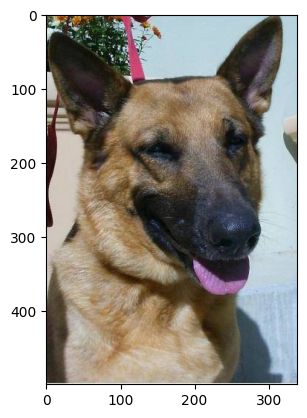

In [59]:
img=mpimg.imread('/content/train/dog.2484.jpg')
imgplt=plt.imshow(img)
plt.show()

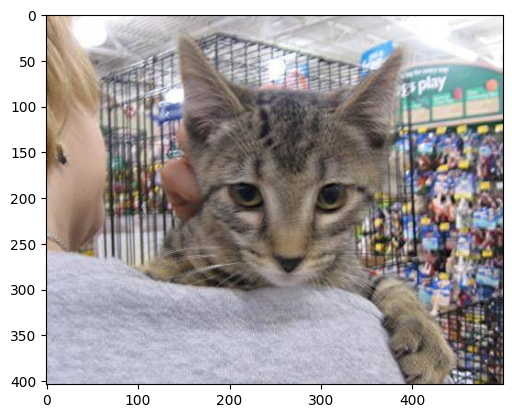

In [60]:
#Displaying the images of cats
img=mpimg.imread('/content/train/cat.10449.jpg')
imgplt=plt.imshow(img)
plt.show()

Resizing all the images

In [70]:
file_names=os.listdir('/content/train')

dog_count=0
cat_count=0
for img_file in file_names:
    # Check if file name starts with 'dog'
    if img_file[:3] == 'dog':
        dog_count += 1
    else:
        cat_count += 1
print('Number of dog images:',dog_count)
print('Number of dog images:',cat_count)


Number of dog images: 12500
Number of dog images: 12500


In [71]:
#Resizing all the images
os.mkdir('/content/image_resized')

In [77]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'


for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')


  newImgPath=resized_folder+filename
  img.save(newImgPath)

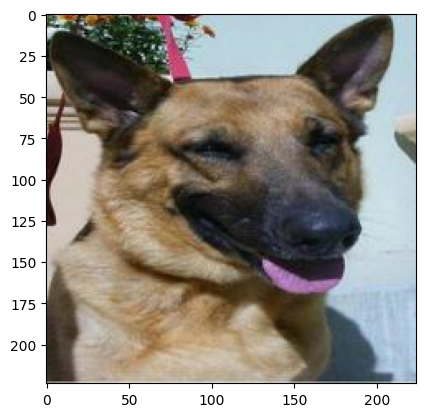

In [78]:
#Displaying resized dog image
img=mpimg.imread('/content/image_resized/dog.2484.jpg')
imgplt=plt.imshow(img)
plt.show()

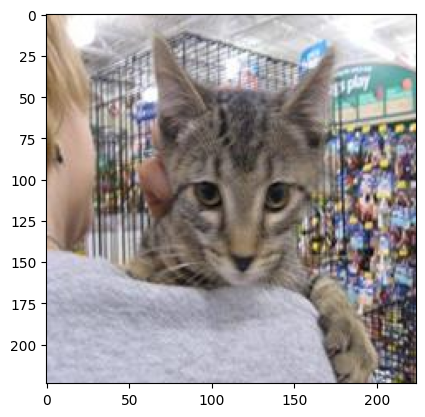

In [79]:
#Displaying resized cat image
img=mpimg.imread('/content/image_resized/cat.10449.jpg')
imgplt=plt.imshow(img)
plt.show()

Creating a labels for Resized dogs and Cats

cat--0

Dog--1

In [80]:
file_names=os.listdir('/content/image_resized')

labels=[]

for i in range(2000):

  file_name =file_names[i]
  label=file_name[:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [83]:
print(file_names[:5])
print(labels[:5])

['cat.9054.jpg', 'dog.8695.jpg', 'cat.10449.jpg', 'cat.11747.jpg', 'dog.12143.jpg']
[0, 1, 0, 0, 1]


In [84]:
#counting the images of cats and dogs out of 2000 images

values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1031  969]


Converting resized images to numpy arrays

In [85]:
import cv2
import glob

In [86]:
image_directory='/content/image_resized/'
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory +'*.' + e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [87]:
print(dog_cat_images)

[[[[156 161 159]
   [159 164 162]
   [167 172 170]
   ...
   [180 181 179]
   [177 175 174]
   [187 185 184]]

  [[147 152 150]
   [145 150 148]
   [152 157 155]
   ...
   [182 183 181]
   [177 175 174]
   [181 179 178]]

  [[144 149 147]
   [136 141 139]
   [143 148 146]
   ...
   [177 178 176]
   [172 170 169]
   [168 166 165]]

  ...

  [[ 43  82 104]
   [ 44  85 107]
   [ 48  89 111]
   ...
   [151 157 156]
   [149 155 154]
   [147 153 152]]

  [[ 43  80 102]
   [ 45  84 106]
   [ 50  89 111]
   ...
   [143 151 150]
   [143 151 150]
   [142 150 149]]

  [[ 41  78 100]
   [ 46  83 105]
   [ 50  89 111]
   ...
   [140 148 147]
   [141 149 148]
   [142 150 149]]]


 [[[117 148 217]
   [119 150 219]
   [122 147 219]
   ...
   [134 163 170]
   [133 162 169]
   [132 161 168]]

  [[124 152 223]
   [120 145 217]
   [112 136 208]
   ...
   [135 164 171]
   [134 163 170]
   [134 163 170]]

  [[127 147 224]
   [121 141 218]
   [116 134 211]
   ...
   [137 166 173]
   [137 166 173]
   [136 165

In [88]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [89]:
x=dog_cat_images
y=np.asarray(labels)

**Train Test Split**

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [91]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [92]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

**Building the Neural Network**

In [93]:
import tensorflow as tf
import tensorflow_hub as hub

In [104]:
mobile_net_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

num_of_classes=2

model=tf.keras.Sequential([
       pretrained_model,
       tf.keras.layers.Dense(num_of_classes)
])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7c5d09162590> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [97]:
model.compile(

              optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc']
)

NameError: name 'model' is not defined

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

In [ ]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('Test loss',score)
print('Test acc',acc)

**Predictive system**

In [ ]:
input_image_path=input('path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2.imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a cat')

else:
  print('The image represents a dog')